### Directing Customers to Subscription Through Financial App Behavior Analysis Machine Learning Project 

### Bussines Problem
The Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. It has two versions free and premium. The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.

In [107]:
## import the essential libraries
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

In [108]:
fintech_appData = pd.read_csv(r"D:\ML_Algos\Directing Customers to Subscription\FineTech_appData.csv")

In [109]:
fintech_appData.head(6) #show first 6 rows of fineTech_appData Dataframe

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [110]:
fintech_appData.tail(6) #show last 6 rows of FineTech_appData Dataframe

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [111]:
## The 6th number column’s (screen_list) full information not visible, so for that we used below python code snippet. We print only 5 rows from index 1 to 5 from the screen_list.
for i in [1,2,3,4,5]:
    print(fintech_appData.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [112]:
## Find the null value in DataFrame using DataFrame.isnull() method and take summation by sum() method.
fintech_appData.isnull().sum() # take the summation of null values

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [113]:
## Take brief information about the dataset using DataFrame.info() method.
fintech_appData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [114]:
## To know how the numeric variable distributed, we used DataFrame.describe() method. It gives total number count, mean value, std (standard deviation), min and max value, and values are below 25%, 50%, 75% of each column.
fintech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
## If you observe the description of ‘dayofweek’ column then you can not get proper information. To solve this issue we print unique values of each column and its length.
## Get the unique values of each columns and it's length
features = fintech_appData.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n ..............\n """.format(i,fintech_appData[i].unique(),len(fintech_appData[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
 ..............
 
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
 ..............
 
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
 ..............
 
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
 ..............
 
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73

In [116]:
# The ‘hour’ column contains object data type, so we converted into integer data type format.
# hour data convert string to int
fintech_appData['hour'] = fintech_appData.hour.str.slice(1,3).astype(int)

#get data type of each column
fintech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [117]:
#get data type of each column
fintech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [118]:
# To visualize the data need numeric values for that we drop some columns that datatype is the object.
# drop object dtype columns.
fintech_appData2 = fintech_appData.drop(['user','first_open','screen_list','enrolled_date'],axis=1)

fintech_appData2.head(6) # head of numeric dataframe

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


### Data visualization

### Heatmap using the correlation matrix

Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

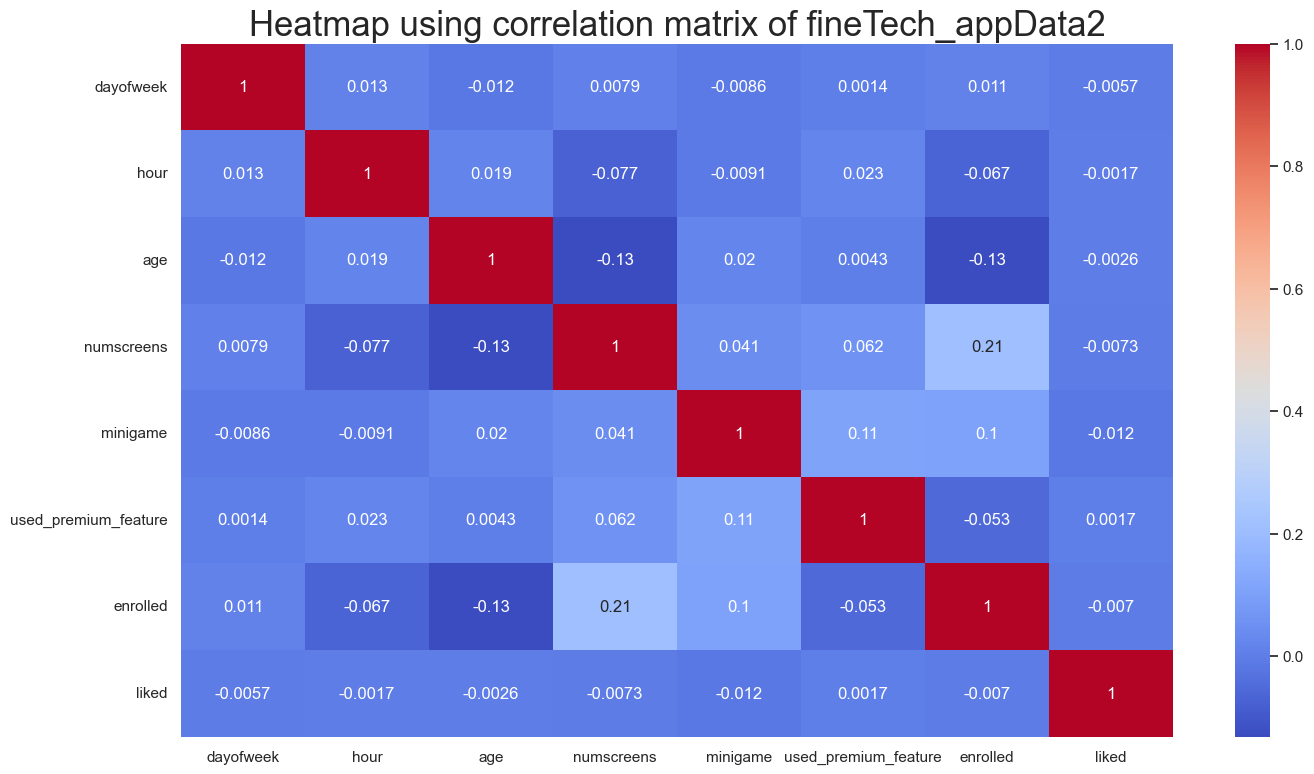

In [119]:
# Heatmap uses to find the correlation between each and every features using the correlation matrix.
plt.figure(figsize=(16,9)) # heatmap size in ration 16:9

sns.heatmap(fintech_appData2.corr(),annot=True, cmap='coolwarm') # show heatmap

plt.title("Heatmap using correlation matrix of fineTech_appData2", fontsize = 25)

### Pair plot of fineTech_appData2

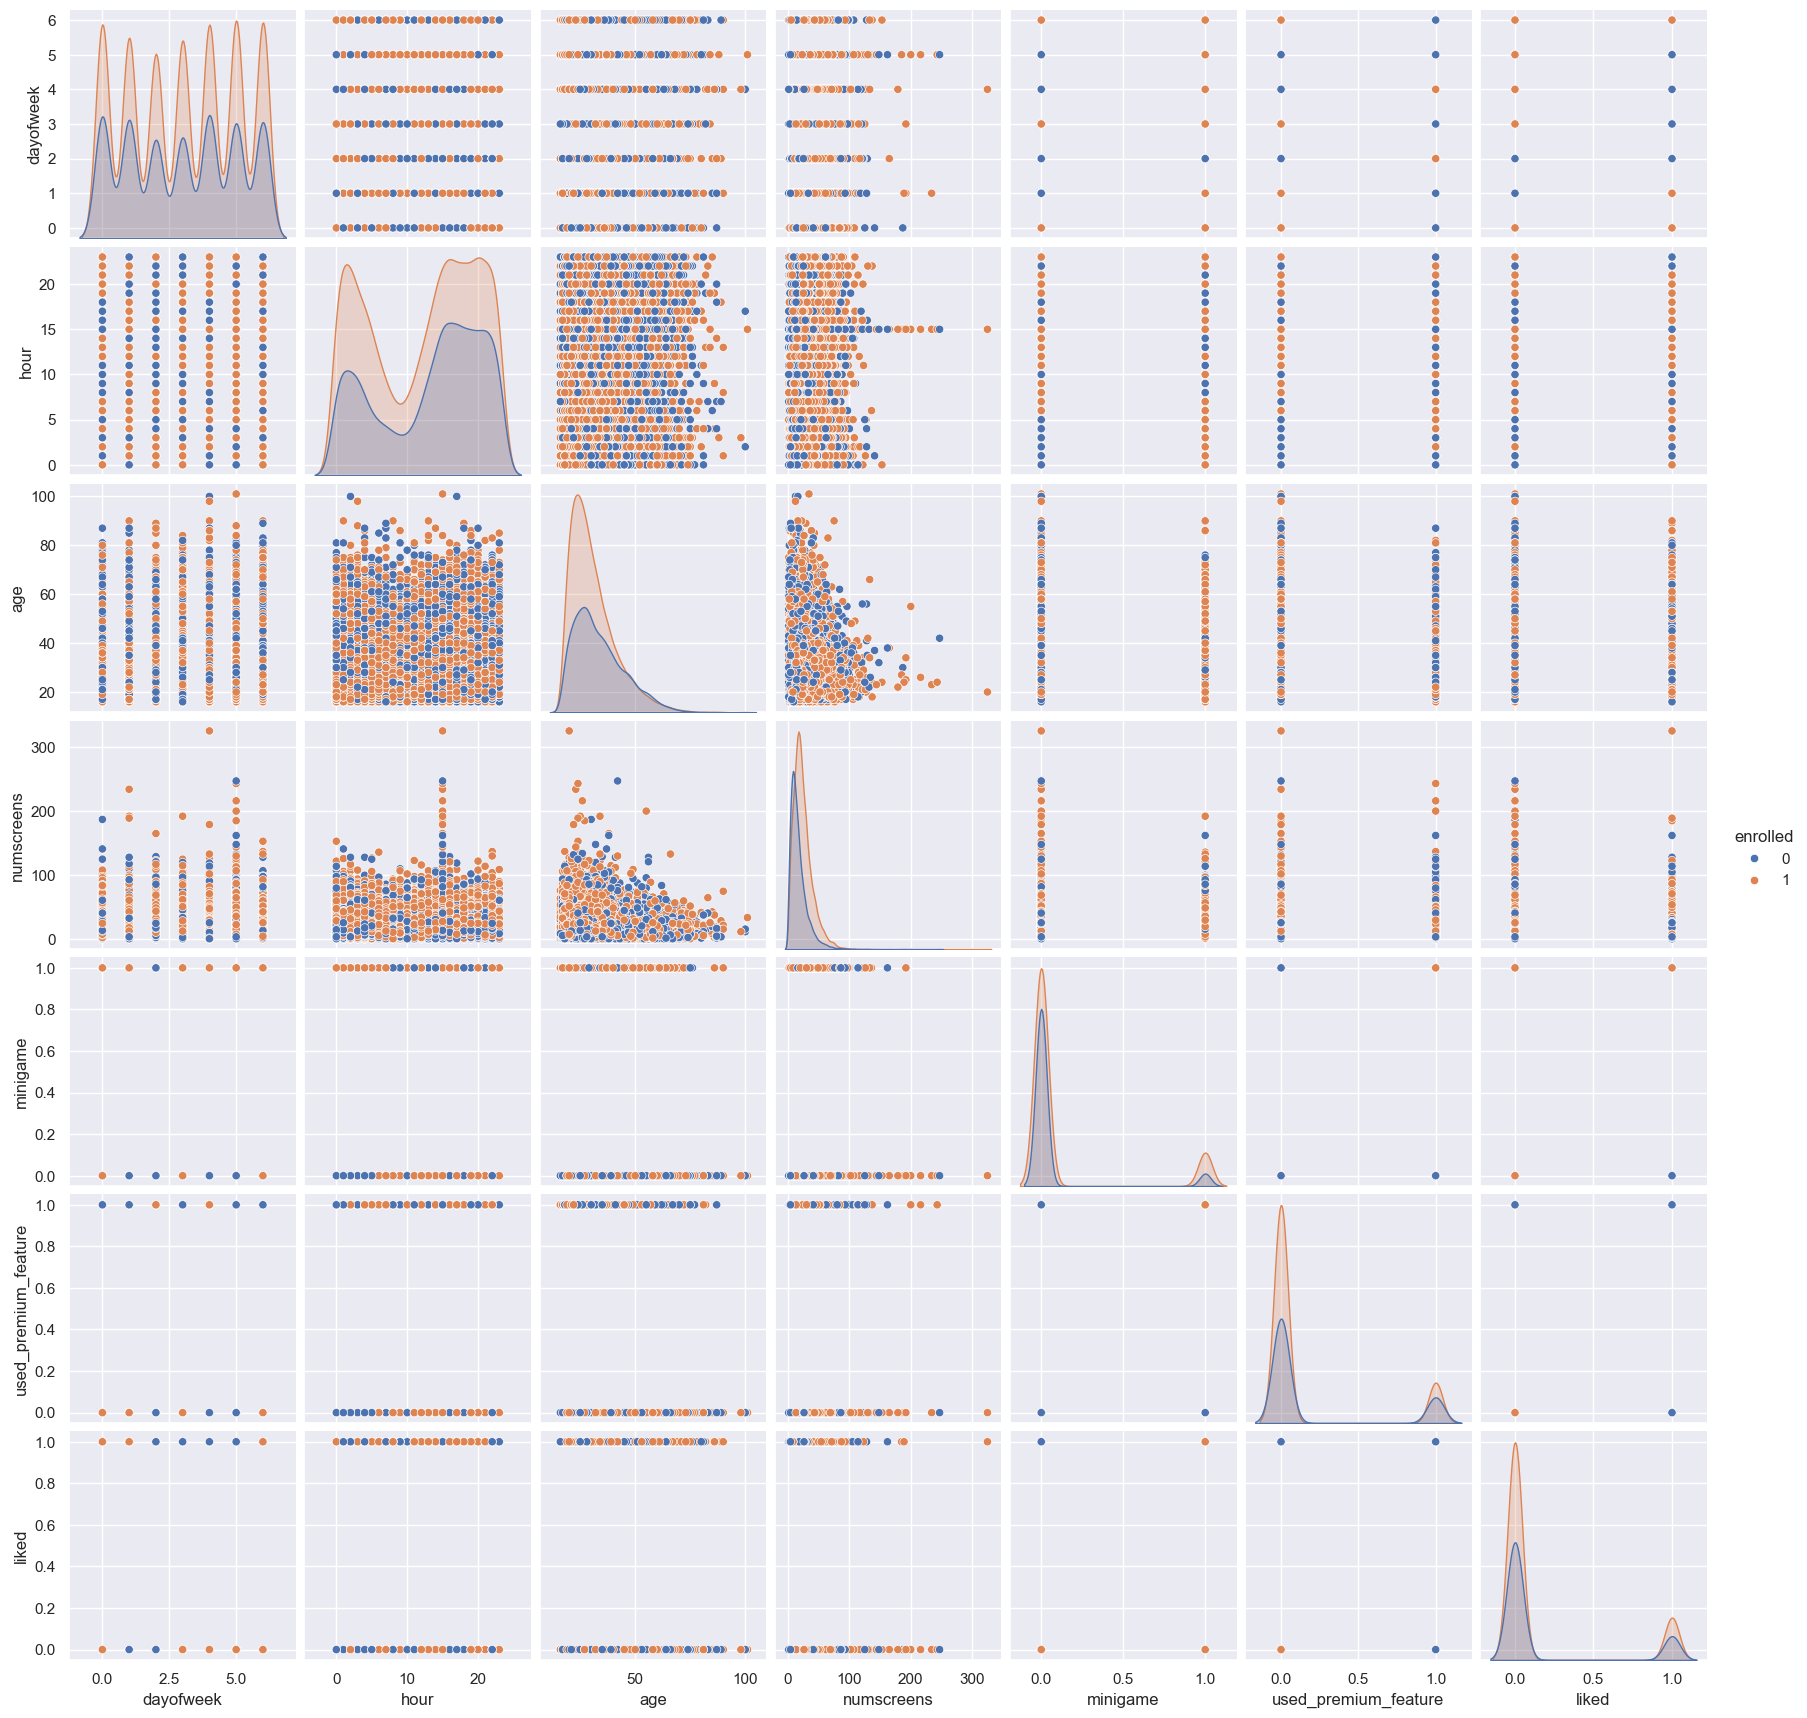

In [120]:
# The pair plot helps to visualize the distribution of data and scatter plot.
# %matplotlib qt5 for showing graphs in seperate window
sns.pairplot(fintech_appData2, hue='enrolled')

### Countplot of enrolled

In [121]:
# show counterplot of enrolled feature
# sns.countplot(fintech_appData.enrolled)
print(fintech_appData['enrolled'].value_counts())

enrolled
1    31074
0    18926
Name: count, dtype: int64


### Histogram of each feature of fintech_appData2

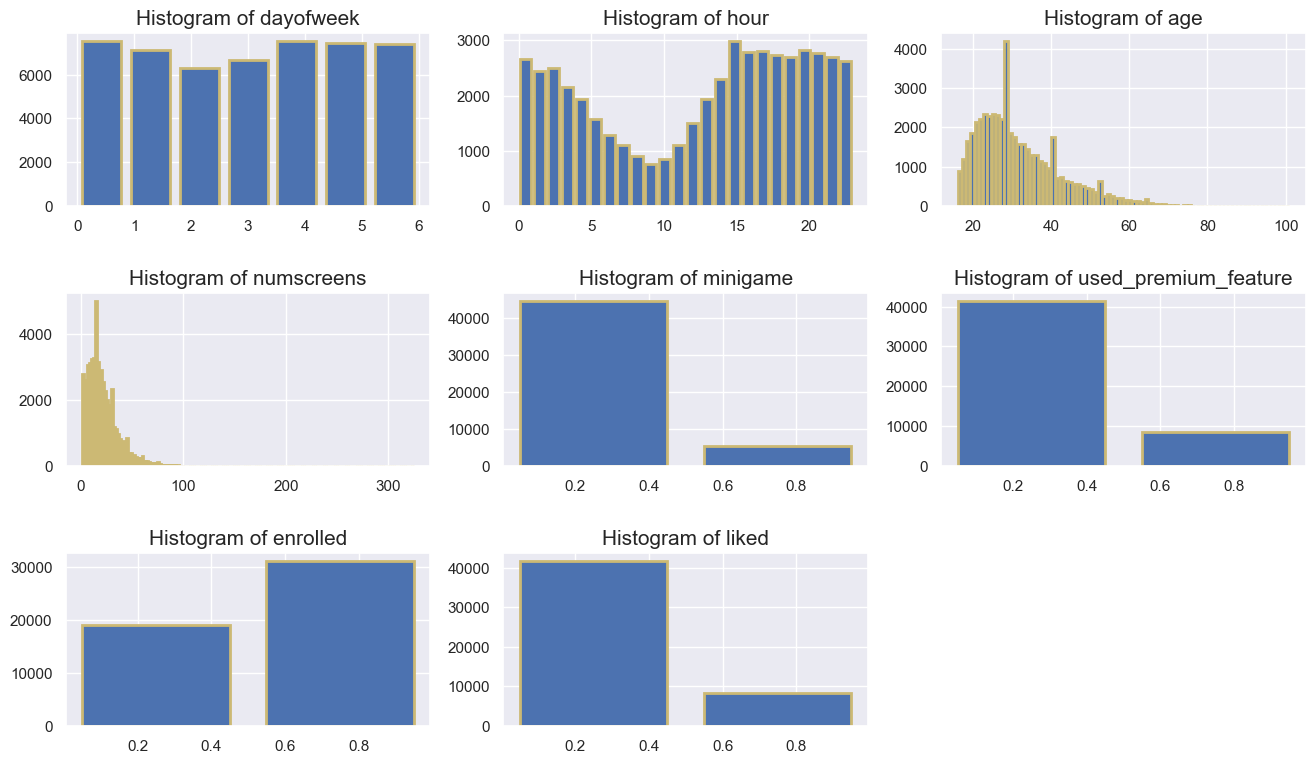

In [122]:
# plot histogram
plt.figure(figsize=(16,9)) # figure size in ratio 16:9
features = fintech_appData2.columns #list of all columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1) # create a subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize=15) # title of histogram
    
    bins = len(fintech_appData2[j].unique()) # bins for histogram
    plt.hist(fintech_appData2[j], bins=bins, rwidth=0.8, edgecolor = "y", linewidth=2) #plot histogram

plt.subplots_adjust(hspace=0.5) # space between horizontal axis (subplots)

### Correlation barplot with ‘enrolled’ feature

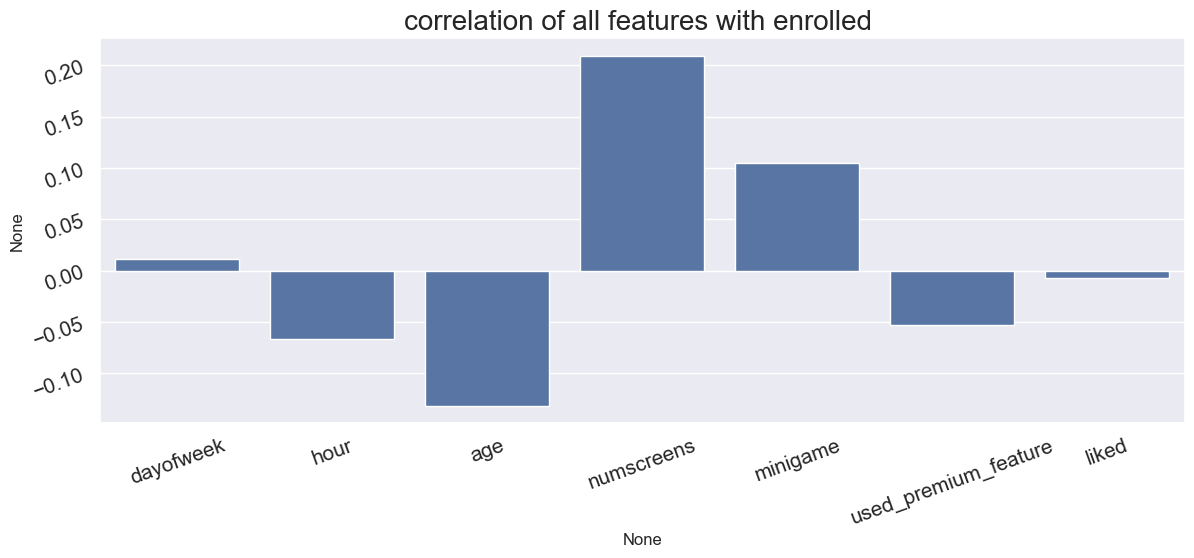

In [123]:
# show corelation barplot

sns.set() # set background dark grid
plt.figure(figsize=(14,5))
plt.title("correlation of all features with enrolled ", fontsize=20)
fintech_appData3 = fintech_appData2.drop(['enrolled'],axis=1) # drop 'enrolled' feature
ax = sns.barplot(x=fintech_appData3.columns,y=fintech_appData3.corrwith(fintech_appData2.enrolled)) #plot barplot
ax.tick_params(labelsize=15, labelrotation=20, color="k") # decorate x & y ticks font

In [124]:
# Now, we are parsing ‘first_open’ and ‘enrolled_date’ object data in data and time format
# parsint object data into date time format

fintech_appData['first_open'] = [parser.parse(i) for i in fintech_appData['first_open']]

fintech_appData['enrolled_date'] = [parser.parse(i) if isinstance(i, str) else i for i in fintech_appData['enrolled_date']]

fintech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [125]:
# We are finding how much time the customer takes to get enrolled in the premium feature app after registration. For that subtract ‘fineTech_appData.first_open’ from ‘fineTech_appData.enrolled_date’ and set data type as timedelta64 in hours.
fintech_appData['time_to_enrolled'] = (fintech_appData.enrolled_date - fintech_appData.first_open) / np.timedelta64(1,'h')

(array([2.8195e+04, 1.0320e+03, 5.6600e+02, 4.2600e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0.       ,  543.4686945, 1086.937389 , 1630.4060835,
        2173.874778 , 2717.3434725, 3260.812167 , 3804.2808615,
        4347.749556 , 4891.2182505, 5434.686945 ]),
 <BarContainer object of 10 artists>)

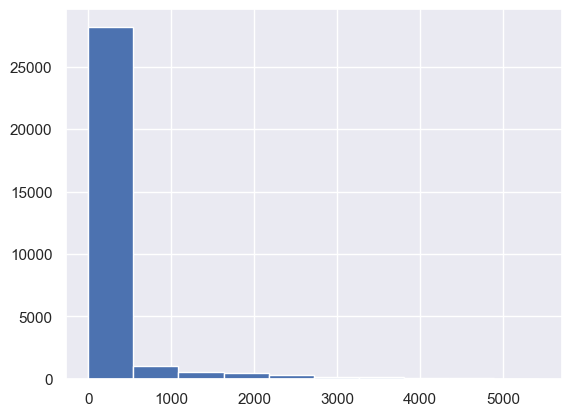

In [126]:
#plot histogram of how much time the customer takes to get enrolled in the premium feature app
plt.hist(fintech_appData['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   178.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

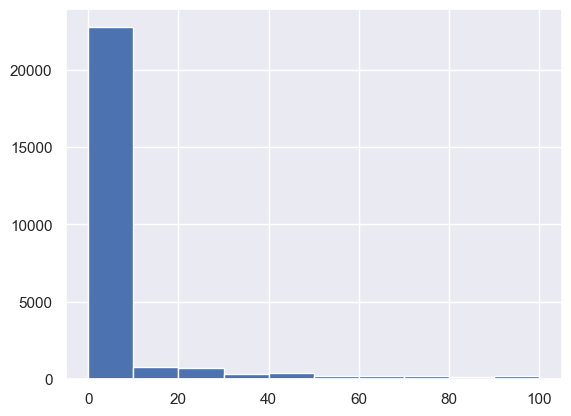

In [127]:
#let’s try to show the distribution in range 0 to 100 hours.
plt.hist(fintech_appData['time_to_enrolled'].dropna(),range=(0,100))

### Feature selection

In [128]:
#We are considering those customers have enrolled after 48 hours as 0.
fintech_appData.loc[fintech_appData.time_to_enrolled > 48, 'enrolled'] = 0

In [129]:
# Drop some ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’ feature they are not strongly correlated to the result.
fintech_appData.drop(columns= ['time_to_enrolled', 'enrolled_date', 'first_open'],inplace=True)

In [130]:
# read csv file and convert it into numpy array
fintech_app_screen_Data = pd.read_csv(r"D:\ML_Algos\Directing Customers to Subscription\top_screens.csv").top_screens.values
fintech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [131]:
# Add ‘,’ at the end of each string of ‘screen_list’ for further operation.
# Assuming fintech_app_screen_Data is a NumPy array
# comma_app_screen_data = [str(x) + ',' for x in fintech_app_screen_Data]

# # Repeat the comma_app_screen_data list to match the length of fintech_appData
# repeated_comma_app_screen_data = comma_app_screen_data * (len(fintech_appData) // len(comma_app_screen_data)) + comma_app_screen_data[:len(fintech_appData) % len(comma_app_screen_data)]

# # Assign the repeated_comma_app_screen_data list to the 'screen_list' column of fintech_appData
# fintech_appData['screen_list'] = repeated_comma_app_screen_data

	
fintech_appData['screen_list'] = fintech_appData.screen_list.astype(str) + ','

In [132]:
fintech_appData.shape

(50000, 10)

In [133]:
# The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from ‘fineTech_app_screen_Data’ and append as a column by the same name to ‘fineTech_appData’. Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

for screen_name in fintech_app_screen_Data:
    fintech_appData[screen_name] = fintech_appData.screen_list.str.contains(screen_name).astype(int)
    fintech_appData['screen_list'] = fintech_appData.screen_list.str.replace(screen_name+",", "")

In [134]:
fintech_appData.shape

(50000, 68)

In [135]:
fintech_appData.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# Those screens are not availble in ‘fineTech_app_screen_Data’ that are counted and conted number store in new column by name ‘remain_screen_list’.
# remaining screens in 'screen_list'
fintech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [137]:
# count remain screen list and store counted number in 'remain_screen_list'
fintech_appData['remain_screen_list'] = fintech_appData.screen_list.str.count(",")

In [138]:
# Drop the screen list
fintech_appData.drop(columns=['screen_list'], inplace=True)

In [139]:
fintech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [140]:
# All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store in a single row for all customers.
# taking the sum of all saving screens in one row
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',]
fintech_appData['saving_screens_count'] = fintech_appData[saving_screens].sum(axis = 1)
fintech_appData.drop(columns= saving_screens, inplace=True)

In [141]:
# similarly for credit, CC1 and loan screens.
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fintech_appData['credit_screens_count'] = fintech_appData[credit_screens].sum(axis = 1)
fintech_appData.drop(columns = credit_screens, axis = 1, inplace=True)

In [142]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fintech_appData['cc_screens_count'] = fintech_appData[cc_screens].sum(axis = 1)
fintech_appData.drop(columns=cc_screens, inplace=True)

In [143]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fintech_appData['loan_screens_count'] = fintech_appData[loan_screens].sum(axis = 1)
fintech_appData.drop(columns = loan_screens, inplace=True)

In [144]:
fintech_appData.shape

(50000, 50)

In [145]:
fintech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [146]:
# Numerical distribution of fineTech_appData
fintech_appData.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.495740,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499987,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


### Heatmap with the correlation matrix

<Axes: >

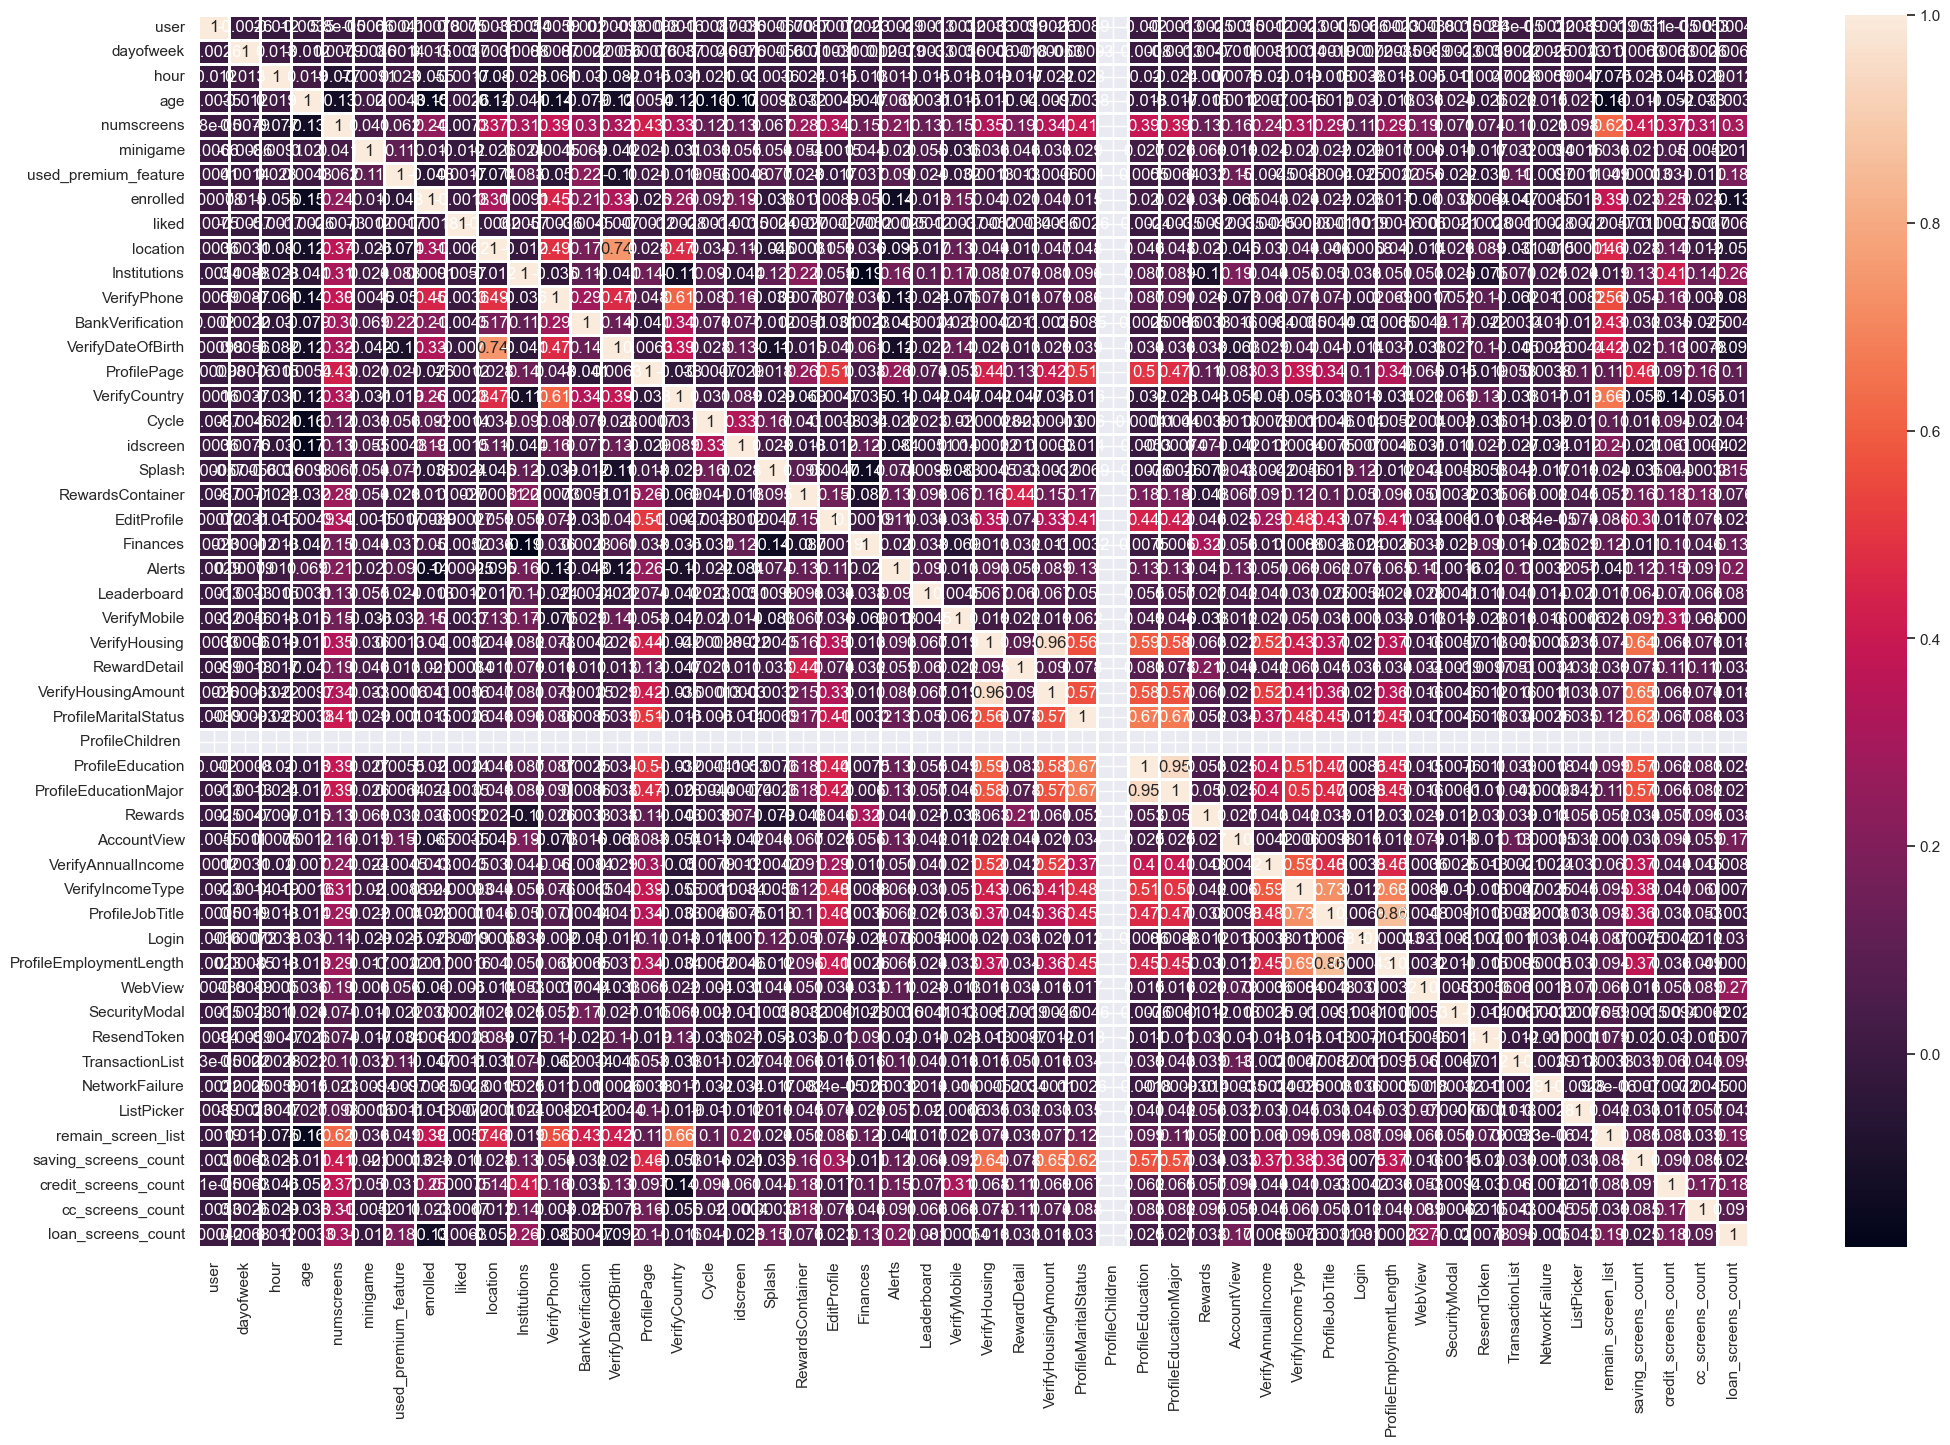

In [147]:
# Heatmap with correlation matrix of new fineTech_appData

plt.figure(figsize=(25,16))
sns.heatmap(fintech_appData.corr(), annot=True, linewidth=2)

### Data Preprocessing
### split dataset in Train and Test

In [148]:
clean_fintech_appData = fintech_appData
target = fintech_appData['enrolled']
fintech_appData.drop(columns='enrolled', inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fintech_appData, target, test_size = 0.2, random_state=0) 

In [149]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [150]:
# take User ID in another variable
train_userID = X_train['user']
X_train.drop(columns='user', inplace=True)

test_userID = X_test['user']
X_test.drop(columns='user',inplace=True)

In [151]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


## Feature Scaling

In [152]:
# The multiple features in the different units so for the best accuracy need to convert all features in a single unit.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Machine learning Model Building

In [153]:
# The target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.

# To build the best model, 
# we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model.

In [154]:
# import required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Decision Tree Classifier

In [155]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7036

In [156]:
# train with standard Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.7031

### K – Nearest Neighbor Classifier

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

0.6982

In [158]:
# train with Standard Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.732

### Naive Bayes Classifier

In [159]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_score(y_test, y_pred_nb)

0.7116

In [160]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_nb_sc)

0.7116

### Random Forest Classifier

In [161]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.7613

In [162]:
# train with Standard Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)

0.7612

### Logistic Regression

In [163]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, penalty='l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_score(y_test, y_pred_lr)

c:\Users\Nishanijohnkrupakar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7665

In [164]:
# train with standard Scaling dataset
lr_model2 = LogisticRegression(random_state=0,penalty='l2')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_lr_sc)

0.7691

### Support Vector Classifier

In [165]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy_score(y_test, y_pred_svc)

0.7616

In [166]:
# train with Standard Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_svc_sc)

0.7794

### XGBoost Classifier

In [167]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.785

In [168]:
# train with Standard Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc)

0.785

In [169]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
    learning_rate = 0.01,
    n_estimators = 5000,
    max_depth = 4,
    min_child_weight = 6,
    gamma = 0,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.005,
    objective = 'binary:logistic',
    nthread = 4,
    scale_pos_weight = 1,
    seed = 27
)

xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)

accuracy_score(y_test, y_pred_xgb_pt1)

0.7891

In [170]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
    learning_rate = 0.01,
    n_estimators = 5000,
    max_depth = 4,
    min_child_weight = 6,
    gamma = 0,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.005,
    objective = 'binary:logistic',
    nthread = 4,
    scale_pos_weight = 1,
    seed = 27
)

xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7891

In [171]:
# We observ that Support Vector Classifier and XGBoost Classifier give best accuracy than ohter ML algorithm. But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.

### Confusion Matrix

Text(0.5, 1.0, 'Confussion Matrix')

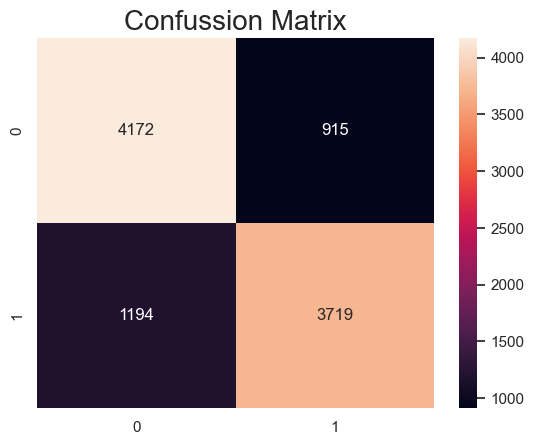

In [172]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot=True, fmt= 'g')
plt.title("Confussion Matrix", fontsize = 20)

In [173]:
# The model is giving type II error higher than type I.

### Classification report of ML model

In [174]:
# Classification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)

print("classification_report >>> \n", cr_xgb_pt2)

classification_report >>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5087
           1       0.80      0.76      0.78      4913

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



### Cross-validation of the ML model

In [175]:
# To find the ML model is overfitted, under fitted or generalize doing cross-validation.
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2,X = X_train_sc, y= y_train, cv = 10)

print("Cross validation of XGBoost model = ", cross_validation)
print("Cross validation of XGBoost model (in mean) = ", cross_validation.mean())

Cross validation of XGBoost model =  [0.7925  0.778   0.789   0.78425 0.7795  0.78825 0.7925  0.7805  0.791
 0.777  ]
Cross validation of XGBoost model (in mean) =  0.78525


### Mapping predicted output to the target

In [176]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2

print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 0

[10000 rows x 3 columns]


### Save the Machine Learning model

In [177]:
# After completion of the Machine Learning project or building the ML model need to deploy in an application. To deploy the ML model need to save it first. To save the Machine Learning project we can use the pickle or joblib package.

### Save the ML model with Pickle

In [178]:
# pickle
import pickle

# save model
pickle.dump(xgb_model_pt2, open('Fintech_app_ML_model.pickle', 'wb'))

# load model
ml_model_p1 = pickle.load(open('Fintech_app_ML_model.pickle', 'rb'))

# predict the output
y_pred_p1 = ml_model_p1.predict(X_test_sc)

# confustion matrix
cm_p1 = confusion_matrix(y_test, y_pred_p1)
print('Confusion matrix = \n', cm_p1)

# show the accuracy
print('Accuracy of model = ', accuracy_score(y_test, y_pred_p1))

Confusion matrix = 
 [[4172  915]
 [1194 3719]]
Accuracy of model =  0.7891


### Save the Ml model with Joblib

In [179]:
# joblib
# from sklearn.externals import joblib
import joblib

# save model
joblib.dump(xgb_model_pt2, 'Fintech_app_ML_model.joblib')

# load model
ml_model_jl = joblib.load('Fintech_app_ML_model.joblib')

# predict the output
y_pred_jl = ml_model_jl.predict(X_test_sc)

cm_jl = confusion_matrix(y_test, y_pred_jl)
print('confusion matrix = \n', cm_jl)

print("Accuracy of model = ", accuracy_score(y_test, y_pred_jl))

confusion matrix = 
 [[4172  915]
 [1194 3719]]
Accuracy of model =  0.7891


In [180]:
# Note: When we dump the model then model file is store in the disk where the project file is store but we can change path by passing its address.